In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path = '/Users/abhilesh/June 18/Api.env')

True

# Part 1 - Personal Finance Planner
 Collect Crypto Prices Using the requests Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_data_eth
response_content_eth = response_data_eth.content
response_content_eth
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19078700,
            "total_supply": 19078700,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 20921.0,
                    "volume_24h": 18305903846,
                    "market_cap": 399250240959,
                    "percentage_change_1h": 0.106038158210934,
                    "percentage_change_24h": -2.13374985369082,
                    "percentage_change_7d": 1.97345979366962,
                    "percent_change_1h": 0.106038158210934,
                    "percent_change_24h": -2.13374985369082,
                    "percent_change_7d": 1.97345979366962
                },
                "CAD": {
                    "price": 26937.8796,
                    "volume_24h": 23570681792.1096,
                    "

In [6]:
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32325.46
The current value of your 5.3 ETH is $8214.04


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("API_KEY_ALPACA")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(tickers, timeframe, start=today, end=today,).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_ticker.head()

AGG                                    \
                             open     high      low  close   volume   
timestamp                                                             
2022-06-27 04:00:00+00:00  100.68  100.945  100.475  100.6  8262506   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-06-27 04:00:00+00:00       33188  100.69446  391.12  391.36  387.44   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-27 04:00:00+00:00  388.59  65752562      549951  389.085474

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.6
Current SPY closing price: $388.59


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19429.50
The current value of your 200 AGG shares is $20120.00


## Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
total_data = {'amount':[total_crypto, total_shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,40539.500142
shares,39549.500000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

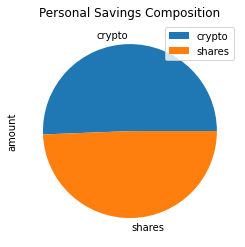

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached the financial goal")
else:
    print(f"You are {total_savings - emergency_fund} dollars away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


# Part 2 - Retirement Planning
 Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today
start_date = pd.Timestamp('2017-06-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-06-27', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
df_stock_data = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date,).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2017-06-27 04:00:00+00:00  109.93  109.9800  109.7901  109.82   3072302   
2017-06-28 04:00:00+00:00  109.85  109.8800  109.6800  109.86  12184475   
2017-06-29 04:00:00+00:00  109.53  109.6800  109.4650  109.65   3377194   
2017-06-30 04:00:00+00:00  109.62  109.6273  109.4600  109.51   2626939   
2017-07-03 04:00:00+00:00  109.30  109.3000  109.0100  109.09   1817281   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2017-06-27 04:00:00+00:00       11545  109.865556  243.01  243.380  241.310   
2017-06-28 04:00:00+00:00        9789  109.871051  242.51  243.715  242.230   
2017-06-29 04:00:00+00:00       12108  109.620298  243.62  243.720  239.955   
2017-06-30 04:00:00+00:00       10668  109.546443  242.30  242.710  241.575   
2017-07-03 04:00:00+00:00        7321  109.130388  242.90  243.380  242.210   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-06-27 04:00:00+00:00  241.33   82247666      270664  242.289384  
2017-06-28 04:00:00+00:00  243.49   70042599      224934  243.068322  
2017-06-29 04:00:00+00:00  241.35  106949719      395288  241.730427  
2017-06-30 04:00:00+00:00  241.80   86820694      241580  242.015951  
2017-07-03 04:00:00+00:00  242.21   39153806      134045  242.802969

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2017-06-27 04:00:00+00:00  109.93  109.9800  109.7901  109.82   3072302   
2017-06-28 04:00:00+00:00  109.85  109.8800  109.6800  109.86  12184475   
2017-06-29 04:00:00+00:00  109.53  109.6800  109.4650  109.65   3377194   
2017-06-30 04:00:00+00:00  109.62  109.6273  109.4600  109.51   2626939   
2017-07-03 04:00:00+00:00  109.30  109.3000  109.0100  109.09   1817281   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-27 04:00:00+00:00       11545  109.865556          NaN  243.01   
2017-06-28 04:00:00+00:00        9789  109.871051     0.000364  242.51   
2017-06-29 04:00:00+00:00       12108  109.620298    -0.001912  243.62   
2017-06-30 04:00:00+00:00       10668  109.546443    -0.001277  242.30   
2017-07-03 04:00:00+00:00        7321  109.130388    -0.003835  242.90   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2017-06-27 04:00:00+00:00  243.380  241.310  241.33   82247666      270664   
2017-06-28 04:00:00+00:00  243.715  242.230  243.49   70042599      224934   
2017-06-29 04:00:00+00:00  243.720  239.955  241.35  106949719      395288   
2017-06-30 04:00:00+00:00  242.710  241.575  241.80   86820694      241580   
2017-07-03 04:00:00+00:00  243.380  242.210  242.21   39153806      134045   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-27 04:00:00+00:00  242.289384          NaN  
2017-06-28 04:00:00+00:00  243.068322     0.008950  
2017-06-29 04:00:00+00:00  241.730427    -0.008789  
2017-06-30 04:00:00+00:00  242.015951     0.001865  
2017-07-03 04:00:00+00:00  242.802969     0.001696

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993592,1.002314,0.995586,0.995388,0.996882,1.009909,1.007420,0.999603,0.988660,0.998099,...,1.001100,0.989204,0.994955,0.994027,0.994369,0.999803,0.997971,1.000526,0.991973,1.012101
2,0.997820,1.001271,1.002061,1.003501,1.002350,0.995939,1.013844,1.016583,0.996191,0.991907,...,1.003911,0.995984,1.006702,0.987554,0.982013,1.003436,0.991051,0.994522,0.976984,1.003762
3,1.000653,0.994762,0.997292,0.999897,1.012289,0.996129,1.019883,1.020140,0.995147,0.985020,...,1.007993,0.997237,0.995166,0.986316,0.993647,1.013710,0.982837,0.999828,0.980108,1.003255
4,1.019868,1.006556,1.014114,1.002906,1.019359,0.990296,1.031930,1.021635,0.995422,0.982831,...,1.011171,0.995043,0.987328,0.993323,0.983223,1.030331,0.979404,0.994935,0.983381,0.998631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.645691,7.509984,8.911948,7.735308,18.311329,5.777372,7.548547,4.570548,2.265692,2.021295,...,9.563412,8.564770,13.231237,1.922206,5.756125,3.481801,1.894101,8.197958,3.952112,5.639695
7557,8.714239,7.556873,8.929671,7.703942,18.471210,5.732527,7.592809,4.549793,2.256782,2.009855,...,9.405617,8.608147,13.536303,1.906816,5.694732,3.479873,1.899301,8.218973,4.005796,5.559694
7558,8.811738,7.550919,9.024083,7.644912,18.356052,5.769460,7.565158,4.525086,2.265847,1.974727,...,9.417922,8.539074,13.650003,1.911664,5.636816,3.505648,1.896290,8.214902,4.013806,5.599870
7559,8.776046,7.633421,8.997887,7.687975,18.255555,5.792966,7.425477,4.529556,2.266205,1.972530,...,9.383579,8.513283,13.628030,1.944586,5.690052,3.504919,1.882640,8.241155,3.948050,5.572440


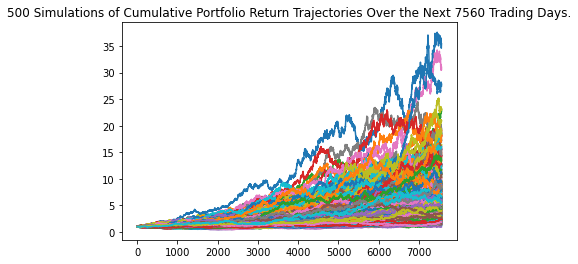

In [20]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation() 

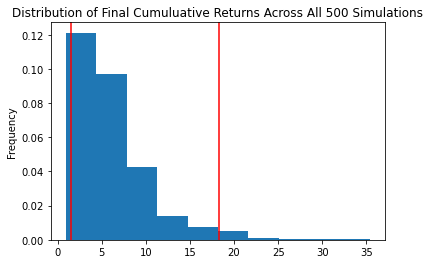

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              6.127815
std               4.411056
min               0.935523
25%               3.144351
50%               4.924696
75%               7.757457
max              35.414584
95% CI Lower      1.527528
95% CI Upper     18.236686
Name: 7560, dtype: float64


In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30550.56 and $364733.72


In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $45825.84 and $547100.58


# Optional Challenge - Early Retirement
Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_even_dist_five.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2017-06-27 04:00:00+00:00  109.93  109.9800  109.7901  109.82   3072302   
2017-06-28 04:00:00+00:00  109.85  109.8800  109.6800  109.86  12184475   
2017-06-29 04:00:00+00:00  109.53  109.6800  109.4650  109.65   3377194   
2017-06-30 04:00:00+00:00  109.62  109.6273  109.4600  109.51   2626939   
2017-07-03 04:00:00+00:00  109.30  109.3000  109.0100  109.09   1817281   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-27 04:00:00+00:00       11545  109.865556          NaN  243.01   
2017-06-28 04:00:00+00:00        9789  109.871051     0.000364  242.51   
2017-06-29 04:00:00+00:00       12108  109.620298    -0.001912  243.62   
2017-06-30 04:00:00+00:00       10668  109.546443    -0.001277  242.30   
2017-07-03 04:00:00+00:00        7321  109.130388    -0.003835  242.90   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2017-06-27 04:00:00+00:00  243.380  241.310  241.33   82247666      270664   
2017-06-28 04:00:00+00:00  243.715  242.230  243.49   70042599      224934   
2017-06-29 04:00:00+00:00  243.720  239.955  241.35  106949719      395288   
2017-06-30 04:00:00+00:00  242.710  241.575  241.80   86820694      241580   
2017-07-03 04:00:00+00:00  243.380  242.210  242.21   39153806      134045   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-27 04:00:00+00:00  242.289384          NaN  
2017-06-28 04:00:00+00:00  243.068322     0.008950  
2017-06-29 04:00:00+00:00  241.730427    -0.008789  
2017-06-30 04:00:00+00:00  242.015951     0.001865  
2017-07-03 04:00:00+00:00  242.802969     0.001696

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009342,0.999032,0.995849,0.991178,1.002045,0.992180,0.998239,1.006096,0.984370,1.012962,...,0.999145,1.001784,0.977522,0.997043,0.992323,1.009710,0.998613,1.000666,0.998302,0.995800
2,1.008129,1.001306,1.005983,0.994305,0.994952,0.984626,1.000724,1.001790,0.993492,1.015861,...,1.000670,0.994922,0.970583,1.009533,0.989586,1.008929,1.001776,0.996667,0.998183,1.001945
3,1.014867,0.989540,1.004086,0.972195,1.003991,0.989628,1.006365,1.014406,0.985444,1.007414,...,1.002928,0.997220,0.953372,1.013680,0.990002,1.006419,1.006226,0.991086,1.003865,0.991686
4,1.012659,1.006179,1.014608,0.971344,0.995259,0.984829,1.028602,1.014984,0.989651,1.000207,...,1.012504,0.990425,0.959277,1.010501,0.983630,1.013816,1.005168,0.997995,0.993391,0.989882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.015355,1.414912,1.048705,1.144225,0.937601,1.601639,1.264580,1.221992,1.909474,1.310348,...,1.331222,1.222620,1.397341,0.980222,1.115144,1.522877,0.998384,0.898520,2.318214,1.974025
1257,1.026443,1.437832,1.037680,1.137178,0.930700,1.576929,1.261615,1.210383,1.919484,1.307380,...,1.345275,1.220825,1.406182,0.980370,1.102437,1.537631,0.995654,0.891883,2.334927,1.968593
1258,1.030083,1.437290,1.032389,1.135256,0.930678,1.582132,1.272631,1.215632,1.910269,1.302225,...,1.340347,1.216108,1.390172,0.977724,1.095285,1.537361,0.980962,0.889929,2.314842,1.947284
1259,1.031839,1.438610,1.032148,1.136589,0.926479,1.596155,1.267257,1.227000,1.926273,1.291511,...,1.325896,1.217999,1.397109,0.980518,1.102276,1.572267,0.979033,0.891234,2.287216,1.934019


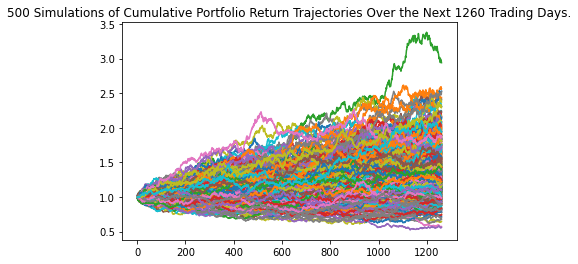

In [27]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

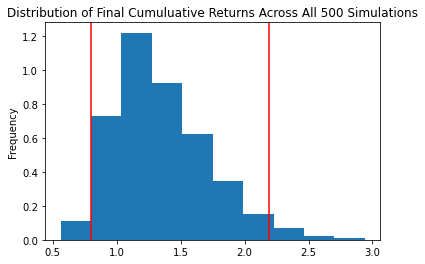

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.351360
std               0.369299
min               0.560839
25%               1.090491
50%               1.287457
75%               1.564513
max               2.940783
95% CI Lower      0.796177
95% CI Upper      2.193662
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47770.6 and $131619.69


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2017-06-27 04:00:00+00:00  109.93  109.9800  109.7901  109.82   3072302   
2017-06-28 04:00:00+00:00  109.85  109.8800  109.6800  109.86  12184475   
2017-06-29 04:00:00+00:00  109.53  109.6800  109.4650  109.65   3377194   
2017-06-30 04:00:00+00:00  109.62  109.6273  109.4600  109.51   2626939   
2017-07-03 04:00:00+00:00  109.30  109.3000  109.0100  109.09   1817281   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-27 04:00:00+00:00       11545  109.865556          NaN  243.01   
2017-06-28 04:00:00+00:00        9789  109.871051     0.000364  242.51   
2017-06-29 04:00:00+00:00       12108  109.620298    -0.001912  243.62   
2017-06-30 04:00:00+00:00       10668  109.546443    -0.001277  242.30   
2017-07-03 04:00:00+00:00        7321  109.130388    -0.003835  242.90   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2017-06-27 04:00:00+00:00  243.380  241.310  241.33   82247666      270664   
2017-06-28 04:00:00+00:00  243.715  242.230  243.49   70042599      224934   
2017-06-29 04:00:00+00:00  243.720  239.955  241.35  106949719      395288   
2017-06-30 04:00:00+00:00  242.710  241.575  241.80   86820694      241580   
2017-07-03 04:00:00+00:00  243.380  242.210  242.21   39153806      134045   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-27 04:00:00+00:00  242.289384          NaN  
2017-06-28 04:00:00+00:00  243.068322     0.008950  
2017-06-29 04:00:00+00:00  241.730427    -0.008789  
2017-06-30 04:00:00+00:00  242.015951     0.001865  
2017-07-03 04:00:00+00:00  242.802969     0.001696

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985108,1.013676,1.002694,1.000935,0.998366,0.994199,1.005603,0.980698,1.012476,1.003773,...,1.008631,1.006457,1.004405,0.994743,1.009397,1.011260,0.988488,1.000749,0.988885,0.990378
2,0.982177,1.002900,1.004635,0.999324,0.989091,0.994864,1.003993,0.986257,1.004658,1.002063,...,1.001497,1.003228,1.005596,0.998164,1.005438,1.003258,0.989342,1.001240,0.989400,0.983362
3,0.987856,1.009085,0.993855,0.985307,0.990351,0.989565,0.995884,0.989270,1.005457,0.994843,...,1.003473,1.002578,1.010107,0.994761,1.003297,1.006630,0.998373,0.991315,0.990229,0.989843
4,1.002653,1.007474,1.003425,0.976261,1.001034,1.001411,0.991264,0.971486,1.010027,0.992837,...,0.993011,1.013710,1.002019,0.992153,0.991423,1.014580,0.993321,0.994792,0.981593,0.997028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.068447,1.444359,1.395758,2.757611,1.092635,1.848723,3.262931,1.316457,1.307679,2.148051,...,1.910589,1.334226,1.543156,1.326537,1.453994,1.514042,1.150878,1.037629,1.434677,2.055958
2517,2.073405,1.445190,1.387260,2.741807,1.094500,1.868025,3.258877,1.320421,1.305368,2.146395,...,1.943122,1.325245,1.537247,1.329271,1.452625,1.502167,1.138935,1.030802,1.424991,2.049415
2518,2.076618,1.444195,1.408021,2.731130,1.101348,1.885726,3.246862,1.337426,1.301006,2.110298,...,1.930128,1.316692,1.540027,1.320163,1.440315,1.489309,1.143922,1.022226,1.435365,2.037743
2519,2.065235,1.440668,1.408467,2.729533,1.100605,1.887147,3.228458,1.335239,1.287446,2.105992,...,1.934240,1.296325,1.526481,1.321796,1.424898,1.482688,1.154623,1.027980,1.446679,2.031007


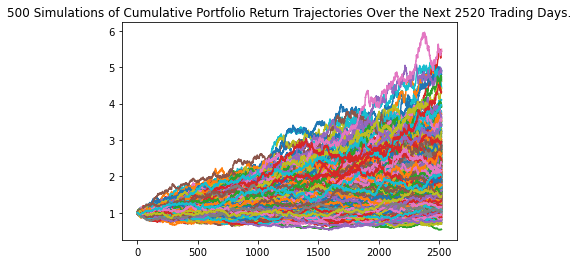

In [33]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

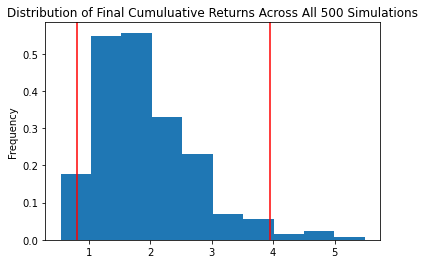

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              1.932932
std               0.822514
min               0.538962
25%               1.364596
50%               1.737371
75%               2.398590
max               5.493761
95% CI Lower      0.813614
95% CI Upper      3.945310
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48816.86 and $236718.62
